In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
seg_data=pd.read_csv("segmentation data.csv")
seg_data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
seg_data["Age"].value_counts()

Age
26    116
27    111
25     88
24     83
28     80
35     79
23     77
31     76
36     73
30     70
29     70
32     67
33     66
34     60
40     58
37     56
38     51
22     49
42     48
39     40
46     35
21     34
43     33
41     33
45     31
44     30
49     29
48     29
47     26
20     23
50     23
57     20
51     19
52     19
54     17
53     16
63     15
64     14
61     13
60     13
65     12
58     12
67     10
56     10
55     10
66      9
62      8
68      7
19      5
59      5
71      5
74      4
73      3
70      3
18      3
75      2
76      1
72      1
Name: count, dtype: int64

In [4]:
purchase_data=pd.read_csv("purchase data.csv")




In [5]:
purchase_data["Age"].value_counts()

Age
27    2859
35    2859
31    2759
32    2487
25    2436
26    2403
40    2265
37    2155
36    2011
33    1931
24    1852
34    1811
38    1575
43    1523
30    1513
28    1402
39    1392
45    1339
23    1251
46    1180
49    1091
29    1045
47    1036
51    1032
41    1002
52     986
48     967
44     962
42     958
57     918
65     714
61     683
53     671
63     652
60     585
50     558
55     556
64     546
58     472
54     468
21     467
67     457
56     414
59     402
66     357
22     319
68     269
18     235
20     196
73     121
19     106
71     101
74      94
70      92
62      86
75      72
Name: count, dtype: int64

In [6]:
seg_data["Occupation"].value_counts()

Occupation
1    1113
0     633
2     254
Name: count, dtype: int64

In [7]:
def check_outliers(df):
    for col in df.columns:
        if df[col].dtype != 'object':
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - (1.5 * iqr)
            upper_bound = q3 + (1.5 * iqr)
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            print(f"Column: {col}")
            print(f"Outliers: {len(outliers)}")
    return df
check_outliers(seg_data) 

Column: ID
Outliers: 0
Column: Sex
Outliers: 0
Column: Marital status
Outliers: 0
Column: Age
Outliers: 57
Column: Education
Outliers: 614
Column: Income
Outliers: 83
Column: Occupation
Outliers: 0
Column: Settlement size
Outliers: 0


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [8]:
seg_data["Education"].value_counts()

Education
1    1386
2     291
0     287
3      36
Name: count, dtype: int64

In [9]:
seg_data["Age"].value_counts()

Age
26    116
27    111
25     88
24     83
28     80
35     79
23     77
31     76
36     73
30     70
29     70
32     67
33     66
34     60
40     58
37     56
38     51
22     49
42     48
39     40
46     35
21     34
43     33
41     33
45     31
44     30
49     29
48     29
47     26
20     23
50     23
57     20
51     19
52     19
54     17
53     16
63     15
64     14
61     13
60     13
65     12
58     12
67     10
56     10
55     10
66      9
62      8
68      7
19      5
59      5
71      5
74      4
73      3
70      3
18      3
75      2
76      1
72      1
Name: count, dtype: int64

In [10]:
q1 = seg_data['Income'].quantile(0.25)
q3 = seg_data['Income'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_income = seg_data[(seg_data['Income'] < lower_bound) | (seg_data['Income'] > upper_bound)]
outlier_incomes = outliers_income['Income'].unique()
outlier_incomes

array([261952, 202575, 227385, 241068, 268340, 244716, 204723, 214204,
       208101, 224998, 211229, 214364, 217651, 222294, 236264, 207783,
       215150, 244541, 210017, 214620, 202997, 219319, 213333, 209856,
       272314, 309364, 281923, 260977, 201699, 220923, 230883, 220050,
       219451, 222360, 205383, 221842, 217450, 254449, 208446, 227021,
        35832, 201656, 223630, 223018, 255198, 235417, 250050, 235660,
       215639, 212020, 231992, 279593, 200298, 199711, 237799, 200621,
       308491, 287247, 268906, 207262, 223185, 203738, 280570, 214126,
       267872, 218664, 224961, 262634, 287106, 281084, 273063, 308529,
       199654, 213768, 214732, 205476, 280566, 211572, 260847, 285647,
       281647,  36760])

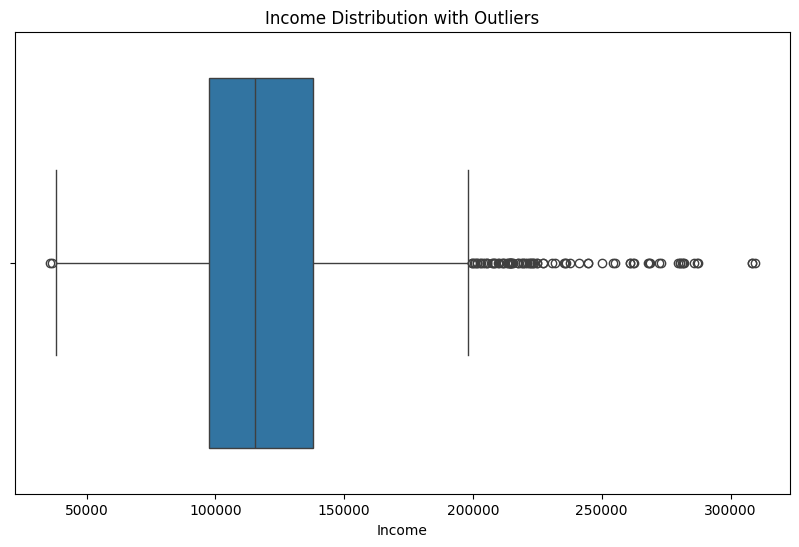

In [11]:


plt.figure(figsize=(10, 6))
sns.boxplot(x=seg_data['Income'])
plt.title('Income Distribution with Outliers')
plt.xlabel('Income')
plt.show()

##  Investigating Outliers  

We identified potential outliers in three variables:  

### 1. Education  
- Unusual values detected: **2, 0, 3**  
- These values fall outside the expected education categories (normally categorical levels like High School, College, Graduate, etc.).  
- **Suggestion**: Validate coding or recode these values into proper categories.  

---

### 2. Age  
- Outlier values detected: **66, 62, 68, 19, 59, 71, 74, 73, 70, 18, 75, 76, 72**  
- Most ages are clustered around 18–76.  
- Ages **18 and 19** may represent the lower boundary (very young customers).  
- Ages **70–76** may represent the higher boundary (older customers, less common in dataset).  
- **Suggestion**: Check if these reflect real customers or data entry issues. If valid, they represent special segments (very young and senior customers).  

---

### 3. Income  
- Outliers identified: **200,000 – 300,000**  
- This is significantly higher than typical income ranges in consumer datasets.  
- **Suggestion**: Verify if these incomes are valid (e.g., high-net-worth individuals) or errors (extra zeros).  

---

###  Conclusion  
- **Education outliers** most of people on 1.  
- **Age outliers** reflect boundary populations (youngest and oldest customers).  
- **Income outliers** could indicate a distinct high-income customer segment, or possible entry errors.  


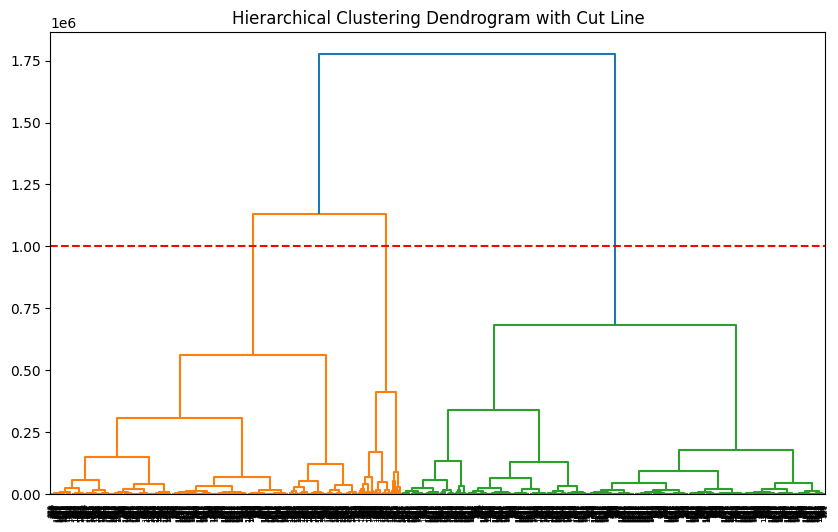

In [ ]:


linked = linkage(seg_data, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)

plt.axhline(y=1e6, color='red', linestyle='--')
plt.title("Hierarchical Clustering Dendrogram with Cut Line")
plt.show()


In [13]:
from sklearn.cluster import AgglomerativeClustering

# نعمل AgglomerativeClustering ونحدد عدد الكلاسترز = 3
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
seg_data['Cluster'] = cluster.fit_predict(seg_data)

seg_data

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,100000001,0,0,67,2,124670,1,2,1
1,100000002,1,1,22,1,150773,1,2,1
2,100000003,0,0,49,1,89210,0,0,0
3,100000004,0,0,45,1,171565,1,1,1
4,100000005,0,0,53,1,149031,1,1,1
...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,1
1996,100001997,1,1,27,1,117744,1,0,0
1997,100001998,0,0,31,0,86400,0,0,0
1998,100001999,1,1,24,1,97968,0,0,0


In [42]:
import pickle   
with open('segmentation_model.pkl', 'wb') as file:
    pickle.dump(cluster, file)

In [14]:
# توزيع الكلاسترز
print(seg_data['Cluster'].value_counts())

# متوسط القيم لكل Cluster
cluster_profile = seg_data.groupby('Cluster').mean(numeric_only=True)
print(cluster_profile)

# categorical variables
for col in ['Sex','Marital status','Education','Occupation','Settlement size']:
    print(f"\n{col} distribution by cluster:")
    print(seg_data.groupby('Cluster')[col].value_counts(normalize=True))


Cluster
0    1097
1     793
2     110
Name: count, dtype: int64
                   ID       Sex  Marital status        Age  Education  \
Cluster                                                                 
0        1.000011e+08  0.543300        0.532361  32.374658   0.922516   
1        1.000009e+08  0.360656        0.460277  39.575032   1.155107   
2        1.000006e+08  0.290909        0.400000  44.727273   1.345455   

                Income  Occupation  Settlement size  
Cluster                                              
0         95485.586144    0.509572         0.436645  
1        141970.047919    1.097100         1.058008  
2        223444.563636    1.745455         1.454545  

Sex distribution by cluster:
Cluster  Sex
0        1      0.543300
         0      0.456700
1        0      0.639344
         1      0.360656
2        0      0.709091
         1      0.290909
Name: proportion, dtype: float64

Marital status distribution by cluster:
Cluster  Marital status
0        

In [15]:
import pandas as pd

# نفترض إن عندك DataFrame اسمه seg_data
# فيه الأعمدة: Age, Cluster

# دالة لتحديد الجيل حسب العمر
def get_generation(age):
    if 13 <= age <= 28:
        return "Gen Z"
    elif 29 <= age <= 44:
        return "Millennials"
    elif 45 <= age <= 60:
        return "Gen X"
    elif 61 <= age <= 79:
        return "Boomers"
    else:
        return "Other"

# نضيف عمود الجيل
seg_data["Generation"] = seg_data["Age"].apply(get_generation)

# توزيع الأجيال في كل Cluster
gen_cluster_dist = seg_data.groupby("Cluster")["Generation"].value_counts(normalize=True).unstack().fillna(0)

print("Distribution of Generations by Cluster:\n")
gen_cluster_dist

# متوسط العمر لكل Cluster للمراجعة
#print("\nAverage Age per Cluster:")


Distribution of Generations by Cluster:



Generation,Boomers,Gen X,Gen Z,Millennials
Cluster,,,,
0,0.016408,0.100273,0.450319,0.432999
1,0.092055,0.214376,0.201765,0.491803
2,0.145455,0.309091,0.136364,0.409091


In [16]:
# بيانات Cluster 0
cluster0_data = seg_data[seg_data["Cluster"] == 0]
print(cluster0_data.head())   # يعرض أول 5 صفوف

# بيانات Cluster 1
cluster1_data = seg_data[seg_data["Cluster"] == 1]
print(cluster1_data.head())

# بيانات Cluster 2
cluster2_data = seg_data[seg_data["Cluster"] == 2]
print(cluster2_data.head())


           ID  Sex  Marital status  Age  Education  Income  Occupation  \
2   100000003    0               0   49          1   89210           0   
10  100000011    1               1   25          1  108469           1   
12  100000013    1               1   22          1  108687           1   
13  100000014    0               0   60          2   89374           0   
14  100000015    1               1   28          1  102899           1   

    Settlement size  Cluster Generation  
2                 0        0      Gen X  
10                0        0      Gen Z  
12                2        0      Gen Z  
13                0        0      Gen X  
14                1        0      Gen Z  
          ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
3  100000004    0               0   45          1  171565           1   
4  10000000

In [17]:
cluster0_data["Sex"].value_counts()# يعرض أول 5 صفوف


Sex
1    596
0    501
Name: count, dtype: int64

In [18]:
# النسبة المئوية لكل عمر في Cluster 0
age_dist_cluster0 = cluster0_data["Age"].value_counts(normalize=True) * 100
print(age_dist_cluster0)  # أول 10 أعمار


Age
26    8.113036
27    7.201459
25    6.289881
23    5.651778
24    5.560620
29    4.284412
31    4.102097
28    4.102097
33    4.010939
35    3.828624
22    3.463993
40    3.190520
30    2.917046
32    2.734731
38    2.643573
36    2.552416
34    2.552416
39    2.461258
37    2.461258
21    2.278943
42    1.731996
20    1.640839
41    1.549681
48    1.458523
43    1.367366
49    1.276208
45    1.276208
46    1.185050
47    1.093892
44    0.911577
50    0.729262
57    0.638104
54    0.546946
52    0.455789
19    0.455789
58    0.364631
65    0.364631
51    0.364631
18    0.273473
61    0.273473
63    0.273473
53    0.182315
67    0.182315
56    0.182315
64    0.182315
60    0.091158
68    0.091158
55    0.091158
66    0.091158
74    0.091158
70    0.091158
59    0.091158
Name: proportion, dtype: float64


In [19]:
cluster0_data["Occupation"].value_counts()

Occupation
0    553
1    529
2     15
Name: count, dtype: int64

In [20]:
# النسبة المئوية لكل عمر في Cluster 0
age_dist_cluster0 = cluster0_data["Occupation"].value_counts(normalize=True) * 100
print(age_dist_cluster0)  


Occupation
0    50.410210
1    48.222425
2     1.367366
Name: proportion, dtype: float64


In [21]:
cluster0_data["Marital status"].value_counts()

Marital status
1    584
0    513
Name: count, dtype: int64

In [22]:
# النسبة المئوية لكل عمر في Cluster 0
age_dist_cluster0 = cluster0_data["Marital status"].value_counts(normalize=True) * 100
print(age_dist_cluster0)  


Marital status
1    53.236098
0    46.763902
Name: proportion, dtype: float64


In [23]:
cluster0_data["Education"].value_counts()

Education
1    832
0    177
2     84
3      4
Name: count, dtype: int64

In [24]:
# النسبة المئوية لكل عمر في Cluster 0
age_dist_cluster0 = cluster0_data["Education"].value_counts(normalize=True) * 100
print(age_dist_cluster0)  


Education
1    75.843209
0    16.134913
2     7.657247
3     0.364631
Name: proportion, dtype: float64


In [25]:
cluster0_data["Settlement size"].value_counts()

Settlement size
0    756
1    203
2    138
Name: count, dtype: int64

In [26]:
# النسبة المئوية لكل عمر في Cluster 0
age_dist_cluster0 = cluster0_data["Settlement size"].value_counts(normalize=True) * 100
print(age_dist_cluster0)  


Settlement size
0    68.915223
1    18.505014
2    12.579763
Name: proportion, dtype: float64


In [27]:
# النسبة المئوية لكل عمر في Cluster 0
age_dist_cluster0 = cluster0_data["Generation"].value_counts(normalize=True) * 100
print(age_dist_cluster0)  


Generation
Gen Z          45.031905
Millennials    43.299909
Gen X          10.027347
Boomers         1.640839
Name: proportion, dtype: float64


In [28]:
seg_data.groupby("Cluster")["Income"].agg(["mean","median","std","min","max"])


,mean,median,std,min,max
Cluster,,,,,
0,95485.586144,99737.0,17585.331120,35832,119684
1,141970.047919,137689.0,17243.978027,119439,184753
2,223444.563636,214364.0,31968.430187,187549,309364


In [29]:
cluster1_data["Occupation"].value_counts()

Occupation
1    556
2    157
0     80
Name: count, dtype: int64

In [30]:
# النسبة المئوية لكل عمر في Cluster 0
age_dist_cluster0 = cluster1_data["Occupation"].value_counts(normalize=True) * 100
print(age_dist_cluster0)  


Occupation
1    70.113493
2    19.798235
0    10.088272
Name: proportion, dtype: float64


In [31]:
# النسبة المئوية لكل عمر في Cluster 0
age_dist_cluster0 = cluster1_data["Generation"].value_counts(normalize=True) * 100
print(age_dist_cluster0)  


Generation
Millennials    49.180328
Gen X          21.437579
Gen Z          20.176545
Boomers         9.205549
Name: proportion, dtype: float64


In [32]:
# النسبة المئوية لكل عمر في Cluster 0
age_dist_cluster0 = cluster1_data["Education"].value_counts(normalize=True) * 100
print(age_dist_cluster0)  


Education
1    64.312736
2    20.302648
0    11.853720
3     3.530895
Name: proportion, dtype: float64


In [33]:
# النسبة المئوية لكل عمر في Cluster 0
age_dist_cluster0 = cluster1_data["Marital status"].value_counts(normalize=True) * 100
print(age_dist_cluster0)  


Marital status
0    53.972257
1    46.027743
Name: proportion, dtype: float64


In [34]:
# النسبة المئوية لكل عمر في Cluster 0
age_dist_cluster0 = cluster1_data["Sex"].value_counts(normalize=True) * 100
print(age_dist_cluster0)  


Sex
0    63.934426
1    36.065574
Name: proportion, dtype: float64


In [35]:
# النسبة المئوية لكل عمر في Cluster 0
age_dist_cluster0 = cluster1_data["Settlement size"].value_counts(normalize=True) * 100
print(age_dist_cluster0)  


Settlement size
1    37.452711
2    34.174023
0    28.373266
Name: proportion, dtype: float64


In [36]:
# النسبة المئوية لكل عمر في Cluster 0
age_dist_cluster2 = cluster2_data["Occupation"].value_counts(normalize=True) * 100
print(age_dist_cluster2)  


Occupation
2    74.545455
1    25.454545
Name: proportion, dtype: float64


In [37]:
# النسبة المئوية لكل عمر في Cluster 0
age_dist_cluster2 = cluster2_data["Generation"].value_counts(normalize=True) * 100
print(age_dist_cluster2)  


Generation
Millennials    40.909091
Gen X          30.909091
Boomers        14.545455
Gen Z          13.636364
Name: proportion, dtype: float64


In [38]:
# النسبة المئوية لكل عمر في Cluster 0
age_dist_cluster2 = cluster2_data["Sex"].value_counts(normalize=True) * 100
print(age_dist_cluster2)  


Sex
0    70.909091
1    29.090909
Name: proportion, dtype: float64


In [39]:
# النسبة المئوية لكل عمر في Cluster 0
age_dist_cluster2 = cluster2_data["Education"].value_counts(normalize=True) * 100
print(age_dist_cluster2)  


Education
2    41.818182
1    40.000000
0    14.545455
3     3.636364
Name: proportion, dtype: float64


In [40]:
# النسبة المئوية لكل عمر في Cluster 0
age_dist_cluster2 = cluster2_data["Marital status"].value_counts(normalize=True) * 100
print(age_dist_cluster2)  


Marital status
0    60.0
1    40.0
Name: proportion, dtype: float64


In [41]:
# النسبة المئوية لكل عمر في Cluster 0
age_dist_cluster2 = cluster2_data["Settlement size"].value_counts(normalize=True) * 100
print(age_dist_cluster2)  


Settlement size
2    52.727273
1    40.000000
0     7.272727
Name: proportion, dtype: float64


 Cluster Analysis – Percentage Breakdown
 Cluster Sizes

Cluster 0: 1097 customers (52.8%)

Cluster 1: 793 customers (38.1%)

Cluster 2: 110 customers (5.1%)

 Sex Distribution

Cluster 0: Male 45.7%, Female 54.3%

Cluster 1: Male 63.9%, Female 36.1%

Cluster 2: Male 70.9%, Female 29.1%

 Marital Status

Cluster 0: Married 53.2%, Single 46.8%

Cluster 1: Single 53.9%, Married 46.0%

Cluster 2: Single 60.0%, Married 40.0%

 Education

Cluster 0: Level 1 → 75.8%, Level 0 → 16.1%, Level 2 → 7.7%, Level 3 → 0.4%

Cluster 1: Level 1 → 64.3%, Level 2 → 20.3%, Level 0 → 11.9%, Level 3 → 3.5%

Cluster 2: Level 2 → 41.8%, Level 1 → 40.0%, Level 0 → 14.5%, Level 3 → 3.6%

 Occupation

Cluster 0: Type 0 → 50.4%, Type 1 → 48.2%, Type 2 → 1.4%

Cluster 1: Type 1 → 70.1%, Type 2 → 19.8%, Type 0 → 10.1%

Cluster 2: Type 2 → 74.5%, Type 1 → 25.5%

 Settlement Size

Cluster 0: Small (0) → 68.9%, Medium (1) → 18.5%, Large (2) → 12.6%

Cluster 1: Medium (1) → 37.5%, Large (2) → 34.2%, Small (0) → 28.4%

Cluster 2: Large (2) → 52.7%, Medium (1) → 40.0%, Small (0) → 7.3%

 Income Profile

Cluster 0: Avg Income ≈ 95,486

Cluster 1: Avg Income ≈ 141,970

Cluster 2: Avg Income ≈ 223,445

 Generation Breakdown

Cluster 0: Gen Z → 45.0%, Millennials → 43.3%, Gen X → 10.0%, Boomers → 1.6%

Cluster 1: Millennials → 49.2%, Gen X → 21.4%, Gen Z → 20.2%, Boomers → 9.2%

Cluster 2: Millennials → 40.9%, Gen X → 30.9%, Boomers → 14.5%, Gen Z → 13.6%

 Insights

Cluster 0 → Younger, balanced male/female, mostly Level 1 education, medium income, mainly small towns.

Cluster 1 → Mid-age, more males, higher education mix, higher income, mix of medium & large cities.

Cluster 2 → Older, predominantly male, higher education, highest income, mostly large cities.